# Normalization 

### Standardization and Scaling 

In [2]:
# setup environment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

%matplotlib inline

print("Ready")

Ready


In [3]:
df = pd.DataFrame({
    'Score1': [62,-47,-55,74,31,77,85,63,42,
              67,89,81,56],
    'Score2': [1062,-1047,-12555,20074,40031,
              1077,1185,163,4222,3467,8889,
              10081,5656]},
    columns=['Score1', 'Score2'])

In [5]:
df.head(3)

,Score1,Score2
0,62,1062
1,-47,-1047
2,-55,-12555


<AxesSubplot:>

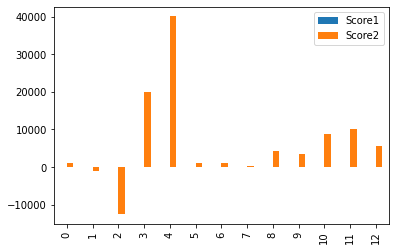

In [6]:
df.plot(kind='bar')

Normalization is useful in the following cases:
    
    - you do not know the distribution of the data
    - you know that your data is not a Gaussian distribution
    - your data has varying scales 
    - your algorithm assumes normality
    - your model is centered around the mean and requires standard variance

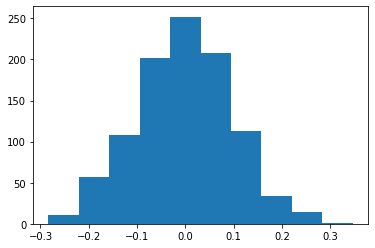

In [8]:
# guassian dist 
sample = np.random.normal(0,0.1,1000)

plt.hist(sample)
plt.show()

In [9]:
# from the bar plot of Score1 and Score 2 
# we see that the ranges are different, with 
# the scale of score2 
# completely drowning out Score1 details  

In [10]:
### looking at the scores individually 

<AxesSubplot:ylabel='Frequency'>

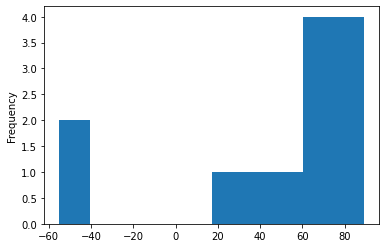

In [14]:
df.Score1.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

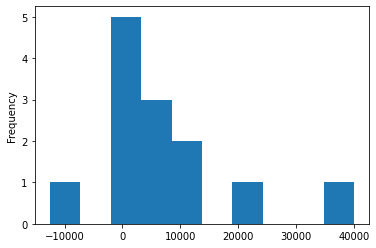

In [13]:
df.Score2.plot(kind='hist')

### to standardize manually

In [15]:
# formular 
#
# z = x - u / S.D
#
# z = scaled value 
# x = feature 
# u = mean 
# S.D = stadard Deviation 

In [16]:
# create a function to rescale 
def zscore_norm(x,u,std):
    z = (x-u)/std
    return z

In [17]:
# find the mean and S.D for each column 

Score1_mean = df.Score1.mean()
Score1_std = df.Score1.std()

print("mean: ", Score1_mean,'\n',"S.D: ",
     Score1_std)

mean:  48.07692307692308 
 S.D:  46.958246592871454


In [18]:
# Score 2
Score2_mean = df.Score2.mean()
Score2_std = df.Score2.std()

print("mean: ", Score2_mean,'\n',"S.D: ",
     Score2_std)

mean:  6331.153846153846 
 S.D:  12547.510416055675


In [19]:
### Apply the zscore function 

In [20]:
df["Score1_z"] = zscore_norm(df.Score1, Score1_mean, Score1_std)

In [21]:
df["Score2_z"] = zscore_norm(df.Score2, Score2_mean, Score2_std)

In [22]:
df.head(3)

,Score1,Score2,Score1_z,Score2_z
0,62,1062,0.296499,-0.419936
1,-47,-1047,-2.024712,-0.588017
2,-55,-12555,-2.195076,-1.505171


<AxesSubplot:>

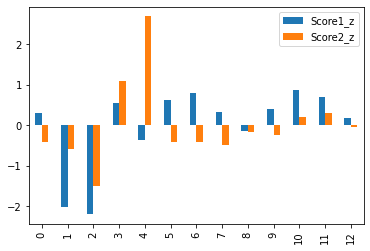

In [25]:
df[["Score1_z", "Score2_z"]].plot(kind='bar')

# Sklearn library 

Scikit-learn is a popular package for data science and machine learning

It contains a preprocessing module that allows us to easily normalize and scale data 

Let's solve the same example with scikit-learn

In [26]:
df2 = df.copy()

In [29]:
# Import sklearn modules 
from sklearn import preprocessing

In [32]:
# print(dir(preprocessing))

# create a standard Scaler obj

std_scalar = preprocessing.StandardScaler()

scikit learn pipelines always involve creating either 
a transform or a model object that we can apply to our dataset

In [33]:
# apply the transform to the columns 

In [34]:
df2[["Score1_sk", "Score2_sk"]] = std_scalar.fit_transform(df2[["Score1", "Score2"]])

In [35]:
df2

,Score1,Score2,Score1_z,Score2_z,Score1_sk,Score2_sk
0,62,1062,0.296499,-0.419936,0.308606,-0.437083
1,-47,-1047,-2.024712,-0.588017,-2.107387,-0.612028
2,-55,-12555,-2.195076,-1.505171,-2.284708,-1.566632
3,74,20074,0.552045,1.095265,0.574587,1.139988
4,31,40031,-0.363662,2.685779,-0.378511,2.795448
5,77,1077,0.615932,-0.418741,0.641082,-0.435839
6,85,1185,0.786296,-0.410133,0.818403,-0.426880
7,63,163,0.317795,-0.491584,0.330771,-0.511657
8,42,4222,-0.129411,-0.168093,-0.134695,-0.174957
9,67,3467,0.402977,-0.228265,0.419431,-0.237585


## Scaling

### Min-Max Scaling

This scales the data points to a fixed range, usually btw 0 and 1

In [36]:
# get the scalar from sklearn
min_max_scalar = preprocessing.MinMaxScaler()

In [39]:
# clean the the table
df3 = df.copy()

df3.head(3)

del df3["Score1_z"]

del df3["Score2_z"]

In [41]:
df3.head(2)

,Score1,Score2
0,62,1062
1,-47,-1047


In [42]:
# apply the minmax scalar using fit-transform
scaled_df = min_max_scalar.fit_transform(df3)

In [43]:
names = df3.columns

In [44]:
res = pd.DataFrame(scaled_df, columns=names)

<AxesSubplot:>

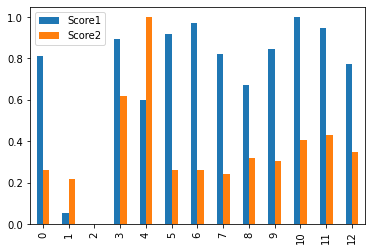

In [46]:
res.plot(kind='bar')